In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('glassdoor_jobs.csv')
if 'Unnamed: 0' in df.columns:
    df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


## Job Title

In [4]:
# df['Job Title'].unique()

In [5]:
#simp;lify job title
def job_title(title):
    raw = title
    title = title.lower()
    if 'director' in title:
        return 'director'
    elif 'manager' in title:
        return 'manager'
    elif 'data scientist' in title or 'data science' in title: 
        return 'data scientist'
    elif 'machine learning' in title or 'AI' in raw or 'deep learning' in title or 'NLP' in raw or 'natural language proces' in title or 'computer vision' in title or 'artificial intelligence' in title:
        return 'mle'
    elif 'data engineer' in title:
        return 'data engineer'
    elif 'analyst' in title:
        return 'analyst'
    else:
        return 'other'

In [6]:
# z = [x for x in df['Job Title'].unique() if 'sr' in x.lower()]
# z

In [7]:
# [x for x in df['Job Title'].unique() if 'associate' in x.lower()]

In [8]:
def job_level(title):
    title = title.lower()
#     if 'manager' in title or 'director' in title:
#         return 'manager'
    if 'sr' in title or 'senior' in title or 'lead' in title or 'principal' in title:
        return 'senior'
    elif 'jr' in title or 'associate' in title:
        return 'jr'
    else:
        return 'other'

In [9]:
df['title'] = df['Job Title'].apply(job_title)
df['level'] = df['Job Title'].apply(job_level)

In [10]:
# df.head()

In [11]:
print(df['title'].value_counts())
df['level'].value_counts()

data scientist    378
other             214
data engineer     155
analyst           122
manager            39
mle                29
director           19
Name: title, dtype: int64


other     661
senior    266
jr         29
Name: level, dtype: int64

## Salary Estimate

In [12]:
# df['Salary Estimate'].unique()
# [x for x in df['Salary Estimate'].unique() if 'Glassdoor est.' not in x]
# [x for x in df['Salary Estimate'].unique() if 'per hour' in x.lower()]

In [13]:
df=df[df['Salary Estimate'].str.strip()!='-1']

In [14]:
df['hourly'] = df['Salary Estimate'].apply(lambda x:1 if 'per hour' in x.lower() else 0)

In [15]:
# [x for x in df['Salary Estimate'] if 'Employer'.lower() in x.lower()]

In [16]:
import numpy as np
import re
def salary_est(salary, hourly):
    m=re.search('(\d{1,4})[\D]{1,5}(\d{1,4})', salary)
    min_salary = float(m.group(1))
    max_salary = float(m.group(2))
    if hourly==1:
        min_salary = 12*4*40*min_salary/1000
        max_salary = 12*4*40*max_salary/1000
    avg_salary = (min_salary+max_salary)/2
    return min_salary, max_salary, avg_salary


In [17]:
df['min_salary'], df['max_salary'], df['avg_salary'] = np.vectorize(salary_est)(df['Salary Estimate'], df['hourly'])

In [18]:
# df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

## Job Description

In [19]:
# df['Job Description'].unique()

In [20]:
# [x for x in df['Job Description'].unique() if 'excel ' in x.lower()]
# [x for x in df['Job Description'].unique() if 'java' in x.lower()]

In [21]:
#python
df['tech_python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
 
#java
df['tech_java'] = df['Job Description'].apply(lambda x: 1 if 'java ' in x.lower()  or 'java,' in x.lower() else 0)

#r studio 
df['tech_R'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)

#spark 
df['tech_spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)

#aws 
df['tech_aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)

#excel
df['tech_excel'] = df['Job Description'].apply(lambda x: 1 if 'excel ' in x.lower() or 'excel,' in x.lower() else 0)



In [22]:
#  Job description length 
df['len_description'] = df['Job Description'].apply(lambda x: len(x))


## Rating

In [23]:
df['Rating'].unique()

array([ 3.8,  3.4,  4.8,  2.9,  4.1,  3.3,  4.6,  3.5,  3.2,  3.7,  3.6,
        3.9,  4.3,  4.2,  4. ,  4.7,  5. ,  3.1,  4.4,  2.8,  2.7,  1.9,
        4.5,  3. ,  2.3,  2.6, -1. ,  2.4,  2.5,  2.2,  2.1])

<AxesSubplot:>

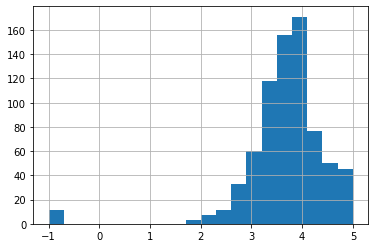

In [24]:
df['Rating'].hist(bins=20)

<AxesSubplot:>

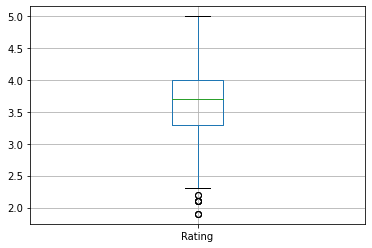

In [25]:
df[df['Rating']!=-1].boxplot(column='Rating')

In [26]:
# pd.Series(pd.qcut(df[df['Rating']!=-1]['Rating'], 4)).value_counts()

In [27]:
# pd.Series(pd.qcut(df[df['Rating']!=-1]['Rating'], 4)).value_counts()

In [28]:
def bins_rating(x):
    if x==-1:
        return 'other'
    elif x<3:
        return 'low'
    elif x<4:
        return 'medium'
    else:
        return 'high'
df['bins_rating'] = df['Rating'].apply(bins_rating)

## Company Name

In [29]:
#clean Company Name
df['Company Name'] = df['Company Name'].apply(lambda x:x.split('\r\n')[0])

## Location

In [30]:
# df['Location'].unique()

In [31]:
df['state_location'] = df['Location'].apply(lambda x: x.split(',')[-1])

In [32]:
df['state_location'].unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' UT', ' TN', ' DE', ' ID', ' RI', ' IA', ' SC',
       ' KS'], dtype=object)

## Headquarters

In [33]:
# df['Headquarters'].unique()

In [34]:
df['state_headquarters'] = df['Headquarters'].apply(lambda x: x.split(',')[-1])

In [35]:
df['state_headquarters'].unique()

array([' CA', ' MD', ' FL', ' WA', ' NY', ' TX', ' VA', ' AR', ' Japan',
       ' NJ', ' MA', ' CO', ' ID', ' GA', ' MI', ' Switzerland', ' IL',
       ' Germany', ' CT', ' NE', ' AL', ' MO', ' OH', ' PA', ' Belgium',
       ' China', ' LA', ' DC', ' AZ', ' IN', ' MN', ' SC',
       ' United Kingdom', ' UT', ' TN', ' WI', ' DE', ' Bermuda',
       ' South Korea', ' RI', ' IA', ' India', ' NC', ' Spain', ' France',
       '-1', ' OR'], dtype=object)

In [36]:
# df[df['Headquarters'].str.contains('India')]

In [37]:
df['job_in_headquarters'] = df.apply(lambda x: 1 if x.Headquarters == x.Location else 0, axis = 1)


In [38]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tech_java,tech_R,tech_spark,tech_aws,tech_excel,len_description,bins_rating,state_location,state_headquarters,job_in_headquarters
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,0,1,2555,medium,NM,CA,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,0,4828,medium,MD,MD,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,0,1,0,1,3495,high,FL,FL,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,3926,medium,WA,WA,1
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,0,0,0,2748,low,NY,NY,1


## Size

In [39]:
df['Size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)

In [40]:
df['Size'].value_counts()

1001 to 5000 employees     150
501 to 1000 employees      134
10000+ employees           130
201 to 500 employees       117
51 to 200 employees         94
5001 to 10000 employees     76
1 to 50 employees           31
Unknown                      9
-1                           1
Name: Size, dtype: int64

<AxesSubplot:>

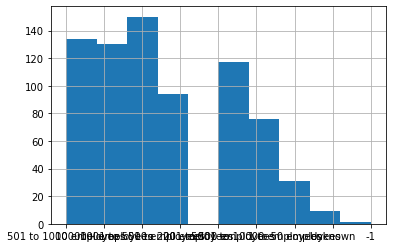

In [41]:
df['Size'].hist()

## Founded

In [42]:
# df['Founded'].unique()

In [43]:
from datetime import datetime

In [44]:
#age of company 
df['age'] = df['Founded'].apply(lambda x: x if x <1 else datetime.now().year - x)

In [45]:
df['age'].unique()

array([ 48,  37,  11,  56,  23,  21,  13,  16,   7,  12,  10,  53,  59,
         9, 240,  26, 106,   8,  86, 172,  69, 169,  24,  25,  47,  52,
       151,  36,  -1,   6,  28,  63,  35,  22,  96, 109,  19, 158,  82,
         5, 136,  15,  73,  18,  94,  43, 161,   4,  79,  31,  33,  20,
        14,  29,  27,  44,   2,  39,  84, 143,  55,  50,  78,  34,  76,
       175, 170,  45,  40,  51,  70,  54,  60,  57,  91, 104, 138, 134,
        17, 171, 119, 277,  92,  74,  30,  32,  93, 146, 108,  49, 165,
        38,  99, 209, 107,  41,  67, 191,  46, 122,  42, 132], dtype=int64)

## Type of ownership

In [46]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'title', 'level', 'hourly', 'min_salary', 'max_salary', 'avg_salary',
       'tech_python', 'tech_java', 'tech_R', 'tech_spark', 'tech_aws',
       'tech_excel', 'len_description', 'bins_rating', 'state_location',
       'state_headquarters', 'job_in_headquarters', 'age'],
      dtype='object')

In [47]:
df['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Unknown', 'College / University',
       'School / School District', '-1'], dtype=object)

In [48]:
df['Type of ownership'] = df['Type of ownership'].apply(lambda x:'Unknown' if x=='-1' else x)

## Industry

In [50]:
# df['Industry'].unique()

## Sector

In [51]:
# df['Sector'].unique()

In [52]:
df[df['Sector']=='-1']

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tech_R,tech_spark,tech_aws,tech_excel,len_description,bins_rating,state_location,state_headquarters,job_in_headquarters,age
43,Data Engineer,$68K-$129K (Glassdoor est.),Position Title: Data Engineer\r\n\r\nPersivia ...,3.6,Persivia,"Marlborough, MA","Lowell, MA",1 to 50 employees,-1,Company - Private,...,0,0,0,0,2042,medium,MA,MA,0,-1
377,Data Operations Lead,Employer Provided Salary:$85K-$90K,Data Operations Lead\r\nLocation: Flexible tho...,-1.0,Muso,"San Francisco, CA","San Francisco, CA",201 to 500 employees,-1,Nonprofit Organization,...,0,0,0,0,5970,other,CA,CA,1,-1
472,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,...,0,0,0,0,3334,other,MA,CA,0,-1
518,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,...,0,0,0,0,3239,other,MA,CA,0,-1
583,Data Scientist,$81K-$140K (Glassdoor est.),"As a Data Scientist, you will play a critical ...",-1.0,ALIN,"New York, NY","Noida, India",Unknown,-1,Company - Private,...,0,0,0,0,1850,other,NY,India,0,-1
703,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,...,0,0,0,0,3334,other,MA,CA,0,-1
741,"Scientist – Cancer Discovery, Molecular Assay",Employer Provided Salary:$100K-$135K,"Scientist – Cancer Discovery, Molecular Assay\...",-1.0,Monte Rosa Therapeutics,"Cambridge, MA",-1,-1,-1,Unknown,...,0,0,0,0,3465,other,MA,-1,0,-1
778,"Senior Scientist, Cell Pharmacology/Assay Deve...",Employer Provided Salary:$110K-$130K,"Senior Scientist, Cell Pharmacology/Assay Deve...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,...,0,0,0,0,3239,other,MA,CA,0,-1
819,"Principal Research Scientist/Team Lead, Medici...",Employer Provided Salary:$120K-$145K,"Principal Research Scientist/Team Lead, Medici...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,...,0,0,0,0,3111,other,MA,CA,0,-1
943,"Research Scientist, Immunology - Cancer Biology",Employer Provided Salary:$100K-$140K,"Research Scientist, Immunology - Cancer Biolog...",-1.0,Kronos Bio,"Cambridge, MA","San Mateo, CA",Unknown,-1,Company - Private,...,0,0,0,0,3334,other,MA,CA,0,-1


## Revenue

In [53]:
df['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)', '-1'], dtype=object)

## Competitors

In [54]:
# df['Competitors'].unique()

In [55]:
#Competitor count
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)


In [56]:
df.to_csv('salary_data_cleaned.csv',index = False)